# Email Spam Classification

| Group Member  | Student ID | Email|
| ------------- | ------------- | ------------- | 
| Aur Marina Iuliana | 1809715  | aur.1809715@studenti.uniroma1.it |
| Ilaria Gagliardi | 1796812 | gagliardi.1796812@studenti.uniroma1.it |
| Sophia Balestrucci | 1713638  | balestrucci.1713638@studenti.uniroma1.it |
| Michele Musacchio | 2070948  | musacchiomichele@gmail.com |
| Viktoriia Vlasenko | 2088928  | viktoriiavvlasenko@gmail.com |


# Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import collections
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('stopwords')
#nltk.download('punkt')

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# 1. Pre-processing

In [3]:
emails = pd.read_csv('emails.csv')
emails.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [5]:
emails.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [6]:
print(emails.columns.isnull().any())

False


In [7]:

# Check data completeness
print(emails.isna().sum())
print(f'total NULL sum: {sum(emails.isna().sum())}')

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64
total NULL sum: 0


Not Spam: 3672 
Spam: 1500


Text(0, 0.5, 'Number of Data points')

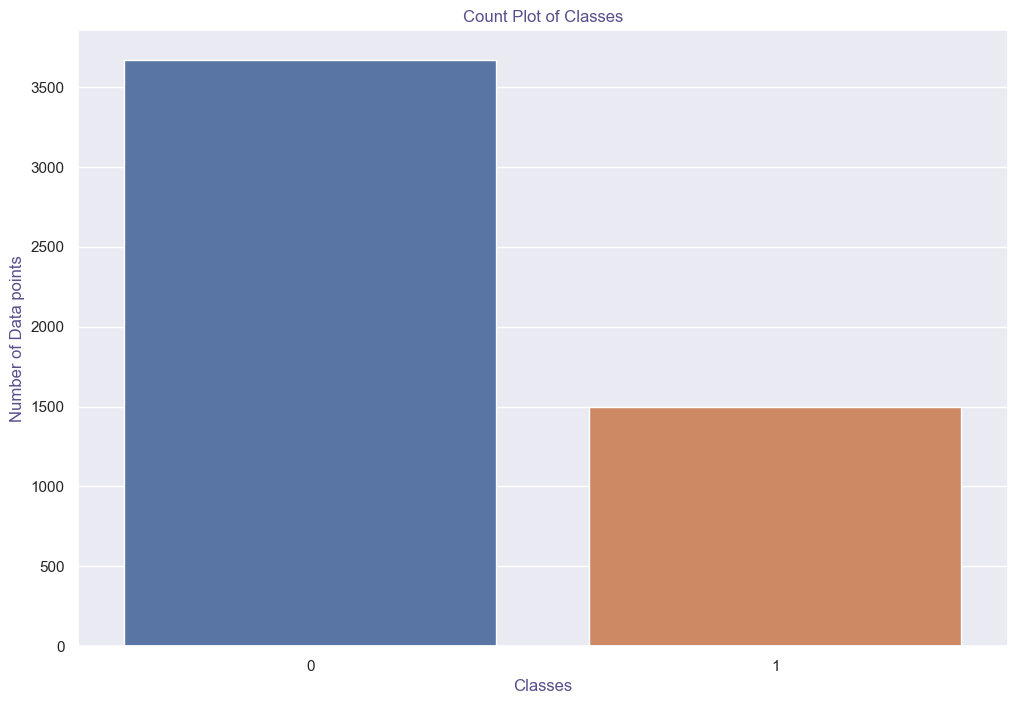

In [8]:
sns.set_theme()
print('Not Spam:', len(emails[emails['Prediction'] == 0]), '\nSpam:', len(emails[emails['Prediction'] == 1]))

plt.figure(figsize=(12,8))
fg = sns.countplot(x = emails["Prediction"])
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

In [9]:
labels = emails['Prediction']

In [10]:
emails = emails.drop(['Email No.', 'Prediction'], axis=1)
emails

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [11]:
n_rows=emails.shape[0]
n_cols=emails.shape[1]
emails.shape # initial shape

(5172, 3000)


## 1.1 Harmonise letter case 


We parse words into lowercase format (be sure that all words are lowercase).

In [12]:
for column in emails.columns:
    if column.islower() == False:
        emails.rename(column, column.lowercase())
        print(column)

## 1.2 Remove numbers, symbols and non alphabetic characters

In [13]:
for column in emails.columns:
    if column.isnumeric() or column.isdigit() or column.isalpha() == False:
        emails.drop(column, inplace=True, axis=1)
        print(column)

Words don't contain any numbers or specific symbols.


## 1.3 Are words unique?

In [14]:
len(set(emails.columns)) == len(emails.columns)

True


## 1.4 Remove the most common words ("stopwords")

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
for column in emails.columns:
    if column in stop_words:
        emails.drop(column, inplace=True, axis=1)
        

In [17]:
emails.shape # the shape after removing the stepwords

(5172, 2866)


## 1.5 Remove all words that are contain n characters

For defining the lenght of words that are too short for using in our model we will check the frequency of words of different lenghts. Let's call it "length analise of words". 

Let's try all words of length less than 8 symbols. According to the list of preposition in english the most common maximum lenght of word is 8 symbols.

In [18]:
def frequency(emails):
    freq = dict()
    for word in emails:
        freq[word] = emails[word].sum()
    for word, appearence in freq.items():
        freq[word] = appearence/emails.shape[0]

    return freq

words_frequency = frequency(emails)

In [19]:
freqs = list(words_frequency.values())
def mean_max(lst):
    mean_lst = sum(lst)/len(lst)
    max_lst = np.max(lst)
    return mean_lst, max_lst

mean_freq, max_freq = mean_max(freqs)
print(f"The mean of frequencies: {mean_freq}")
print(f"The max of frequencies: {max_freq}")

The mean of frequencies: 0.23837910289394676
The max of frequencies: 84.79524361948955


In [20]:
def words_of_lenght_of_n(words_frequency, n):
    words_n = dict()
    for word, fr in words_frequency.items():
        if len(word) == n:
            words_n[word] = fr
    return words_n

In [21]:
freq_of_prepositions = dict()
for i in range(1, 8+1):
    freq_of_prepositions[str(i)] = dict()

for n in freq_of_prepositions.keys():
    freq_of_prepositions[n] = words_of_lenght_of_n(words_frequency, int(n))

In [22]:
mean_n1, max_n1 = mean_max(list(freq_of_prepositions[str(1)].values()))
mean_n2, max_n2 = mean_max(list(freq_of_prepositions[str(2)].values()))
mean_n3, max_n3 = mean_max(list(freq_of_prepositions[str(3)].values()))
mean_n4, max_n4 = mean_max(list(freq_of_prepositions[str(4)].values()))
mean_n5, max_n5 = mean_max(list(freq_of_prepositions[str(5)].values()))
mean_n6, max_n6 = mean_max(list(freq_of_prepositions[str(6)].values()))
mean_n7, max_n7 = mean_max(list(freq_of_prepositions[str(7)].values()))
mean_n8, max_n8 = mean_max(list(freq_of_prepositions[str(8)].values()))

print(f"For words with length of n = 1: mean = {mean_n1}; max = {max_n1}")
print(f"For words with length of n = 2: mean = {mean_n2}; max = {max_n2}")
print(f"For words with length of n = 3: mean = {mean_n3}; max = {max_n3}")
print(f"For words with length of n = 4: mean = {mean_n4}; max = {max_n4}")
print(f"For words with length of n = 5: mean = {mean_n5}; max = {max_n5}")
print(f"For words with length of n = 6: mean = {mean_n6}; max = {max_n6}")
print(f"For words with length of n = 7: mean = {mean_n7}; max = {max_n7}")
print(f"For words with length of n = 8: mean = {mean_n8}; max = {max_n8}")

For words with length of n = 1: mean = 21.102002234252808; max = 84.79524361948955
For words with length of n = 2: mean = 1.621290957402005; max = 12.501160092807424
For words with length of n = 3: mean = 0.22583945604537245; max = 5.143851508120649
For words with length of n = 4: mean = 0.06718433622093452; max = 0.7345320959010054
For words with length of n = 5: mean = 0.04160151652711929; max = 1.3352668213457077
For words with length of n = 6: mean = 0.029765161416697897; max = 0.6278035576179428
For words with length of n = 7: mean = 0.026875483372003038; max = 0.5593580819798917
For words with length of n = 8: mean = 0.020571214572034313; max = 0.23723897911832947


<BarContainer object of 8 artists>

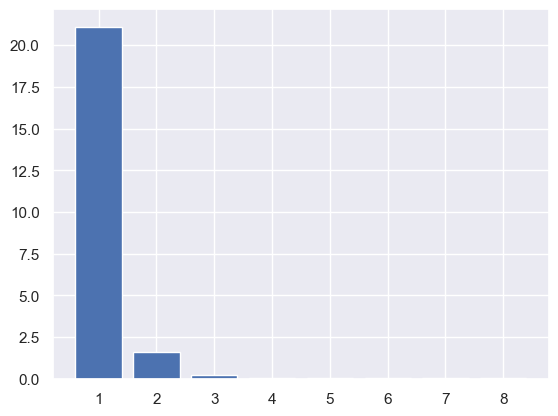

In [23]:
means = [mean_n1,mean_n2,mean_n3,mean_n4,mean_n5,mean_n6,mean_n7,mean_n8]
plt.bar(range(1, 8+1), means)

As we see the most common words have length from 1 to 3. We originally thought about removing these words, but found that doing so made the results worse. In conclusion, we have removed only those of length 1 to avoid **loss of information**.

In [24]:
for column in emails.columns:
    if len(column) == 1:
        emails.drop(column, inplace=True, axis=1)
        
emails.shape

(5172, 2848)

As a result of "cleaning process" we dropped 3000-2848=152 words

***SPACY LIBRARY FOR TEXT PROCESSING***

In [25]:
import spacy
nlp = spacy.load('en_core_web_sm')

**Tokenization**

In [26]:
words = nlp(" ".join(emails.columns))
token_is_stop = []
token_is_punct = []
token_is_space = []
for token in words: 
    if token.is_stop: token_is_stop.append(str(token))
    if token.is_punct: token_is_punct.append(str(token))
    if token.is_space: token_is_space.append(str(token))
    # print(token, token.idx, token.text_with_ws,
    #       token.is_alpha, token.is_punct, token.is_space,
    #       token.shape_, token.is_stop)
    
print(f"Number of stop words from spaCy library = {len(token_is_stop)}")
print(f"Number of punctuation synbols from spaCy library = {len(token_is_punct)}")
print(f"Number of spaces from spaCy library = {len(token_is_space)}")

Number of stop words from spaCy library = 127
Number of punctuation synbols from spaCy library = 0
Number of spaces from spaCy library = 0


Accoring to results dataset has already cleaned of of spaces and punctuation symbols. Also was detected 127 stop words.

In [27]:
# dropping stop words from spaCy
for column in emails.columns[:-1]:
    if column in token_is_stop:
        emails.drop(column, inplace=True, axis=1)
        
emails.shape

(5172, 2726)


We have to check if all stop words are dropped.

In [28]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
for token in nlp(" ".join(emails.columns)):
    if token.is_stop: 
        print(token, token.idx, token.text_with_ws,
          token.is_alpha, token.is_punct, token.is_space,
          token.shape_, token.is_stop)
        
        try: 
            emails.drop([token.text], inplace=True, axis=1)
        except Exception as e:
            print(e)

i 1372 i True False False x True
"['i'] not found in axis"
i 2789 i True False False x True
"['i'] not found in axis"
can 3612 can True False False xxx True
"['can'] not found in axis"
not 3615 not  True False False xxx True
"['not'] not found in axis"
we 10819 we True False False xx True
"['we'] not found in axis"


**Lemmatization**

The library spiCy provides good lemmatization engine that we can use for reducing number of features by its lemmas

In [29]:
n_features_before_lemmatization = len(nlp(" ".join(emails.columns)))
print(f"Number of features before lemmatization = {n_features_before_lemmatization}")

Number of features before lemmatization = 2730


In [30]:
lemmas = dict()
for token in nlp(" ".join(emails.columns)):
    if token.lemma_ not in lemmas.keys():
        lemmas[token.lemma_] = []
    lemmas[token.lemma_].append(token.text)
    # print(token, token.lemma_)
    
print(f"Number of features after lemmatization = {len(lemmas.keys())}")

Number of features after lemmatization = 2232




**Grouping by lemmas**

In [31]:
lemmas_2={}
for key, values in lemmas.items():
    for value in values:
        lemmas_2[value]= key

In [32]:
print(len(lemmas_2.keys()))

2728


In [33]:
emails = emails.groupby(lemmas_2, axis = 1).sum()

In [34]:
emails

,abdv,ability,able,ac,accept,acceptance,access,accord,account,accountant,...,yes,yesterday,york,young,yvette,zajac,zero,zivley,zone,zonedubai
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,7,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
4,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,0,1,4,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5170,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have noticed that by removing more features of these, the results start to get worse, so we have decided to stop here with the selection phase.

# 2. Standardization 

We want to standardize the dataset to put all data on the **same scale**. In fact, if the data are on different scales the model could get confused and give more weight to the data with **higher magnitude**.

For standardization we used the *StandardScaler* method of the Scikit-learn library, which standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

$$ z = {(x - u) \over s} $$

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
scaler.fit(emails)
emails_standardization = scaler.transform(emails)

In [37]:
emails_standardization

array([[-0.01390634, -0.15530541, -0.3110483 , ..., -0.08354819,
        -0.09986539, -0.08488494],
       [-0.01390634, -0.15530541, -0.3110483 , ..., -0.08354819,
        -0.09986539, -0.08488494],
       [-0.01390634, -0.15530541, -0.3110483 , ..., -0.08354819,
        -0.09986539, -0.08488494],
       ...,
       [-0.01390634, -0.15530541, -0.3110483 , ..., -0.08354819,
        -0.09986539, -0.08488494],
       [-0.01390634, -0.15530541,  0.56804558, ..., -0.08354819,
        -0.09986539, -0.08488494],
       [-0.01390634,  3.07055628,  2.32623334, ..., -0.08354819,
        -0.09986539, -0.08488494]])

# 3. Split: Train, Validation, Test

## 3.2 Train, Validation, Test

We split the dataset in such a way as to use one part of the dataset for training, one for testing and one for valutation.

As suggested in the literature, the training dataset is *larger* than that of testing and valutation, to allow learning to occur properly. 

The split of the dataset is done through the train_test_split method of the Scikit-learn library.

In [38]:
emails_standardization.shape

(5172, 2226)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(emails_standardization, labels, stratify=labels, test_size=0.15, random_state=18)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=18)

In [40]:
print(len(X_train)) # 72.25%
print(len(X_val)) # 12.75%
print(len(X_test)) # 15%

3736
660
776


# 4. Metrics

We implement some metrics that will then be used in the final performance evaluation phase.

In [41]:
import sklearn.metrics as metrics

## 4.1 Confusion Matrix

Each column of the matrix represents the predicted values, while each row represents the true values.

In [42]:
def my_confusion_matrix(y_true, y_pred):
    fp = 0
    fn = 0
    tp = 0
    tn = 0

    for i in range(len(y_true)):
        if y_pred[i] == y_true[i]:
            if y_pred[i] == 1:
                tp += 1
            else:
                tn += 1
        else:
            if y_pred[i] == 1:
                fp += 1
            else:
                fn += 1

    matrix = [
        [tn, fp],
        [fn, tp]
    ]
    
    return np.array(matrix, dtype=np.int64)

## 4.2 Accuracy

**Accuracy** give us an indication of how often the algorithm classifies a data point correctly. It can be calculated by dividing the *number of correct predictions* over the *total number of predictions*:

$$ Accuracy = {TP + TN \over TP + TN + FP + FN} $$

In [43]:
def my_accuracy_score(y_true, y_pred):
    tn, fp, fn, tp = my_confusion_matrix(y_true, y_pred).ravel()
    accuracy = (tn + tp) / len(y_true)
    return accuracy

## 4.3 Precision

The **precision** of a model describes how many detected items are truly relevant. It can be calculated by dividing the *true positives* by *overall positives*:

$$ Precision = {TP \over TP + FP } $$

In [44]:
def my_precision_score(y_true, y_pred):
    tn, fp, fn, tp = my_confusion_matrix(y_true, y_pred).ravel()    
    precision = tp / (fp + tp)
    return precision

## 4.4 Recall

**Recall** is a measure of how many relevant elements were detected. It can be calculated by dividing *true positives* by the *number of relevant elements*:

$$ Recall = {TP \over TP + FN } $$

In [45]:
def my_recall_score(y_true, y_pred):
    tn, fp, fn, tp = my_confusion_matrix(y_true, y_pred).ravel()
    recall = tp / (tp + fn)
    return recall

## 4.4 FAR, FRR, EER

The metrics above tell us how well the models predict, but it might be interesting to understand **how badly they predict** and **where they fail**.

For this proposal, we computed the **FAR** (False Acceptance Rate) and the **FRR** (False Rejection Rate) in order to find the **EER** (Equal Error Rate), that is graphically described as the point at which these two metrics intersect. 

<ul> 
<li> FAR occurs when we accept a user whom we should actually have rejected. </li>

$$ FAR = { FP \over FP + TN } $$

<li> FRR is the problem of rejecting a legitimate user when we should have accepted him. </li>

$$ FRR = { FN \over FN + TP } $$

<li> EER is the point where FAR and FRR are equal, so it represents the best threshold to choose. The optimal value of EER is the nearest to zero. </li>

</ul>

In [46]:
def compute_EER(predictions):
    total_results = []
    results = [k[1] for k in predictions]                     
    total_results.extend(results)    

    FAR_list = [] # False acceptance rate 
    FRR_list= [] # False rejection rate
    thresholds = np.linspace(0,1,101)              # 101 equally spaced points between 0 and 1
    for threshold in thresholds:
        pred_threshold = [1 if x >= threshold else 0 for x in total_results]                                           
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred_threshold, labels=[0,1]).ravel()
   
        FAR = fp/(fp + tn)                                                                              
        FRR = fn/(fn + tp)

        FAR_list = np.append(FAR_list, FAR)                                                                     
        FRR_list = np.append(FRR_list, FRR)


    # Equal Error Rate
    diff = np.abs(FAR_list - FRR_list)             
    min_i = np.argmin(diff)
    EER = np.mean((FAR_list[min_i], FRR_list[min_i]))
    threshold = thresholds[min_i]

    return EER, FAR_list, FRR_list

In [47]:
def compute_EER_NB(predictions):
    total_results = []
    results = [k[1] for k in predictions]                     
    total_results.extend(results)    

    FAR_list = [] # False acceptance rate 
    FRR_list= [] # False rejection rate
    thresholds = np.linspace(0,1,101)              # 101 equally spaced points between 0 and 1
    for threshold in thresholds:
        pred_threshold = [1 if x >= threshold else 0 for x in total_results]                                           
        tn, fp, fn, tp = metrics.confusion_matrix(y_test_NB, pred_threshold, labels=[0,1]).ravel()

        FAR = fp/(fp + tn)                                                                              
        FRR = fn/(fn + tp)

        FAR_list = np.append(FAR_list, FAR)                                                                     
        FRR_list = np.append(FRR_list, FRR)


    # Equal Error Rate
    diff = np.abs(FAR_list - FRR_list)             
    min_i = np.argmin(diff)
    EER = np.mean((FAR_list[min_i], FRR_list[min_i]))
    threshold = thresholds[min_i]

    return EER, FAR_list, FRR_list

## 4.5 Computational Time

**Computational time** is also a important metric that should not be underestimated when dealing with so much data. Fort this proposal, we import the Python time module.

In [48]:
import time
times = {}

# 5. Model Building: Implemented Classifiers

## 5.1 Logistic Regression

In [49]:
def sigmoid(x):
    sig_x = (1/(1+np.exp(-x)))
    return sig_x

def log_likelihood(theta,features,target,epsilon=1e-7):
    h=sigmoid(np.array([np.dot(theta,features[i,:]) for i in range(features.shape[0])]))
    h = np.maximum(np.full(h.shape, epsilon), np.minimum(np.full(h.shape, 1-epsilon), h))       # fix 0/1 values in h so log is not undefined
    log_l=np.sum([target[i] * np.log(h[i]) + (1-target[i]) * np.log(1-h[i]) for i in range(len(target))])
    log_l=log_l/features.shape[0]

    return log_l


def predictions(features, theta):
    preds = sigmoid(np.array([np.dot(theta,features[i,:]) for i in range(features.shape[0])]))
    return preds


def update_theta(theta, target, preds, features, lr):
    theta += lr * np.array([np.dot(target-preds,features[:,j]) for j in range(features.shape[1])]) / features.shape[0]
    return theta 

def gradient_ascent(theta, features, target, lr, num_steps):
    log_likelihood_history = np.zeros(num_steps)
    for i in range(num_steps):
        preds = predictions(features, theta)
        log_likelihood_history[i] = log_likelihood(theta, features, target)
        theta = update_theta(theta, target, preds, features, lr)

    return theta, log_likelihood_history


In [50]:
x = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
y = np.array(y_train)


In [51]:
# Initialize theta0
start = time.time()
theta0 = np.zeros(x.shape[1])

# Run Gradient Ascent method
n_iter= 500
theta_final, log_l_history = gradient_ascent(theta0,x,y,lr=0.5,num_steps=n_iter)
end = time.time()
print(theta_final)
times['Logistic Regression'] = end - start

[-1.37511969  0.03257042 -0.02768499 ...  0.02616824  0.00641154
  0.14134131]


In [52]:
len(log_l_history)
log_l_history[:10]

array([-0.69314718, -0.47611565, -0.48405176, -0.51834854, -0.46973706,
       -0.3498025 , -0.22127802, -0.17905332, -0.15492798, -0.14469645])

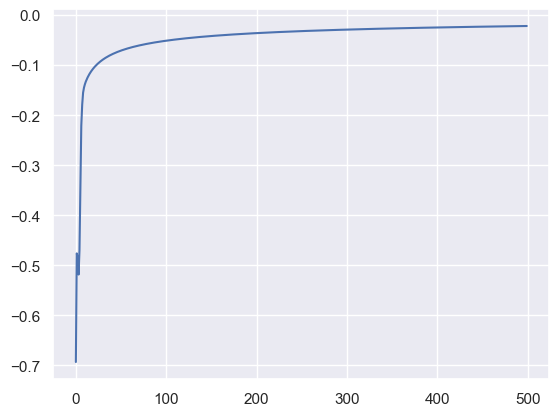

In [53]:
plt.plot(log_l_history)

In [54]:
def my_predict_proba(theta, X):
    z = sigmoid(np.dot(X, theta))
    return [[1-logProb , logProb] for logProb in z]

def my_predict(theta, X, threshold=0.5):
    proba =sigmoid(np.dot(X, theta))
    return np.array([int(x>=threshold) for x in proba])

In [55]:
x_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
y_prob = my_predict_proba(theta_final, x_test)
print(y_prob[:5])
print(y_test[:5])

[[0.9999989081579136, 1.0918420863779824e-06], [0.0, 1.0], [0.9997981665506724, 0.00020183344932758992], [0.989728176580928, 0.010271823419071987], [0.8969651656225981, 0.10303483437740191]]
4505    0
3889    1
4675    0
2613    0
4469    1
Name: Prediction, dtype: int64


In [56]:
thresholds = []
accuracy = []
precision = []
recall = []

threshold = [x * 0.1 for x in range(0, 11)] 
for t in threshold:
    y_pred = my_predict(theta_final, x_test, t)
    accuracy.append(my_accuracy_score(list(y_test), y_pred))
    precision.append(my_precision_score(list(y_test), y_pred))
    recall.append(my_recall_score(list(y_test), y_pred))

output = pd.DataFrame({
    "thresholds": threshold,
    "accuracy": accuracy,
    #"precision": precision, 
    #"recall": recall
    })

print(output)

    thresholds  accuracy
0          0.0  0.289948
1          0.1  0.920103
2          0.2  0.940722
3          0.3  0.957474
4          0.4  0.963918
5          0.5  0.958763
6          0.6  0.952320
7          0.7  0.952320
8          0.8  0.952320
9          0.9  0.930412
10         1.0  0.720361


In [57]:
y_pred_LG = my_predict(theta_final, x_test, 0.4)
y_pred_LG[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

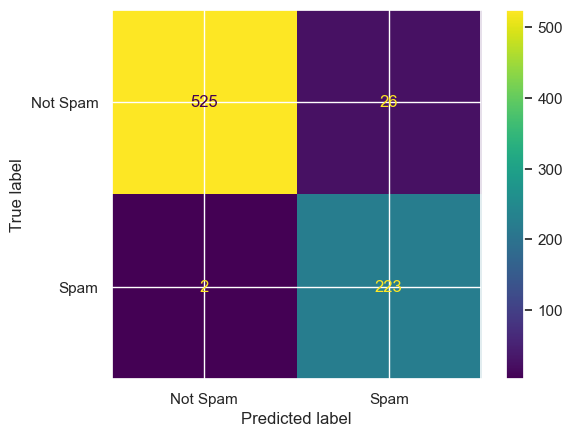

In [58]:
cmLG = my_confusion_matrix(list(y_test), y_pred_LG)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cmLG, display_labels=['Not Spam', 'Spam'])
disp.plot()
plt.show()

In [59]:
y_proba_LG = my_predict_proba(theta_final, x_test)
y_proba_LG[:10]

[[0.9999989081579136, 1.0918420863779824e-06],
 [0.0, 1.0],
 [0.9997981665506724, 0.00020183344932758992],
 [0.989728176580928, 0.010271823419071987],
 [0.8969651656225981, 0.10303483437740191],
 [0.8195176026399129, 0.18048239736008712],
 [0.9998012772562621, 0.00019872274373785619],
 [0.1191940763018029, 0.8808059236981971],
 [0.7287061318679059, 0.2712938681320941],
 [4.337587992120362e-07, 0.9999995662412008]]

## 5.2 Naive Bayes

NOTE: The Dataset is splitted again beacause for the Naive Bayes model we need a not normalized set to compute probabilities (approximated as frequencies)

In [60]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(emails, labels, stratify=labels, test_size=0.15, random_state=18)
X_train_NB, X_val_NB, y_train_NB, y_val_NB = train_test_split(X_train_NB, y_train_NB, test_size=0.15, random_state=18)

Defining parameters of the model: prior probability and likelihood probability

In [61]:
def prior_prob(y_train):
    N_mail = len(y_train)
    N_spam = sum(y_train)
    spam_freq = N_spam/N_mail
    return [1-spam_freq, spam_freq]

def likelihood(X_train, y_train):
    V = list(X_train.columns)               # Vocabulary
    words_in_spam = 0
    words_in_notspam = 0
    
    num_for_word_spam = {col: 0 for col in V}
    num_for_word_notspam = {col: 0 for col in V}
    for i in range(len(y_train)):
        for col in V:
            occurencies = X_train[col].iloc[i]
            if y_train.iloc[i] == 0:
                # not spam
                words_in_notspam += occurencies
                num_for_word_notspam[col] += occurencies
            elif y_train.iloc[i] == 1:
                # spam
                words_in_spam += occurencies
                num_for_word_spam[col] += occurencies
            else:
                raise ValueError
    
    likelihood_prob_spam = np.array([float((num_for_word_spam[col]+1)/(words_in_spam+len(V))) for col in V])
    likelihood_prob_notspam = np.array([float((num_for_word_notspam[col]+1)/(words_in_notspam+len(V))) for col in V])

    return pd.DataFrame([likelihood_prob_notspam, likelihood_prob_spam], index=['Safe', 'Spam'], columns=X_train.columns)

Defining prediction functions

In [62]:
def NB_predict_proba(likelihood, prior, X_test):
    probs = []
    for i in range(len(X_test)):
        log_p_not_norm = np.array([0.0, 0.0])
        for word in X_test.columns:
            log_p_not_norm += (np.log(np.array(likelihood[word])) * X_test[word].iloc[i])
        log_p_not_norm += np.log(prior)
        A = max(log_p_not_norm)
        log_den = A + np.log(sum(np.exp(log_p_not_norm-A)))
        probs.append(log_p_not_norm - log_den)
    return np.array(probs)

def NB_predict(likelihood_prob, prior, X_test, threshold=0.5):
    preds = []
    for i in range(len(X_test)):
        log_p_not_norm = np.array([0.0, 0.0])
        for word in X_test.columns:
            log_p_not_norm += (np.log(np.array(likelihood_prob[word])) * X_test[word].iloc[i])
        log_p_not_norm += np.log(prior)
        preds.append(np.argmax(log_p_not_norm))
    return preds

In [63]:
P = prior_prob(y_train_NB)
P

[0.7061027837259101, 0.29389721627408993]

In [64]:
# These functions are part of the model training process, so we calculate time
start = time.time()
P = prior_prob(y_train_NB)
likelihood_prob = likelihood(X_train_NB, y_train_NB)
end = time.time()

times['Naive Bayes'] = end-start

likelihood_prob

,abdv,ability,able,ac,accept,acceptance,access,accord,account,accountant,...,yes,yesterday,york,young,yvette,zajac,zero,zivley,zone,zonedubai
Safe,0.000001,0.000117,0.000753,0.010165,0.000070,0.000014,0.000210,0.000090,0.000462,0.000029,...,0.000144,0.000078,0.000029,0.000232,0.000048,0.000037,0.000262,0.000051,0.000070,0.000001
Spam,0.000087,0.000252,0.002122,0.010192,0.000186,0.000076,0.000204,0.000038,0.000512,0.000015,...,0.000132,0.000018,0.000025,0.000112,0.000005,0.000003,0.000048,0.000003,0.000244,0.000081


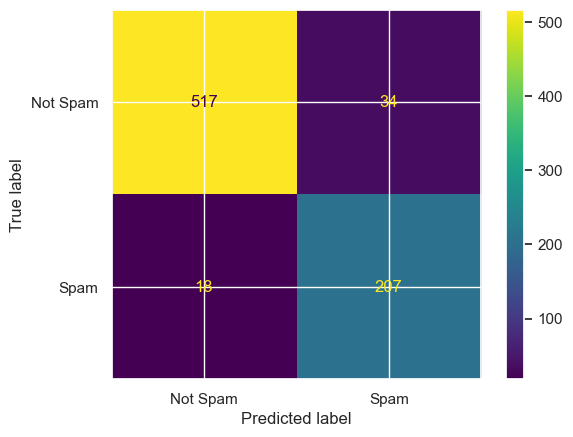

In [65]:
y_pred_NB = NB_predict(likelihood_prob, P, X_test_NB)
cmNB = my_confusion_matrix(np.array(y_test_NB), np.array(y_pred_NB))
disp = metrics.ConfusionMatrixDisplay(cmNB, display_labels=['Not Spam', 'Spam'])
disp.plot()
plt.show()

In [66]:
y_log_prob_NB = NB_predict_proba(likelihood_prob, P, X_test_NB)
y_proba_NB = np.exp(y_log_prob_NB)
y_proba_NB[:10]

array([[1.00000000e+000, 8.54436767e-092],
       [1.17340063e-173, 1.00000000e+000],
       [1.00000000e+000, 2.59742295e-033],
       [9.99976005e-001, 2.39947573e-005],
       [1.06414782e-003, 9.98935852e-001],
       [9.99999686e-001, 3.14488131e-007],
       [1.00000000e+000, 1.38008770e-034],
       [2.86656756e-001, 7.13343244e-001],
       [9.99999939e-001, 6.14171931e-008],
       [6.13705719e-031, 1.00000000e+000]])

# 6. Model Building: Existing Classifiers 
We decide to compare the implemented classifiers with classifiers provided by the Scikit-learn library.

List of classifiers used:
- [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier): at each iteration increases the weight of badly predicted instances so in later iterations the estimators can focus more on those.

- [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier): creates many decision trees, but the sampling for each tree is random, without replacement. This creates a dataset for each tree with unique samples. 

- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier): works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label.

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

## 6.1 Improve the performance with GridSearchCV

At first, we want to improve the performance of our classifiers by using **GridSearchCV** from Scikit-learn library. 

The goal is to find the optimal values of parameters that truly improve performance according to a certain metric. In this part, we choose to perform the classifiers according to the **accuracy metric** and to manage the parameter of **estimators/neighbors** of each of them.

In [68]:
from sklearn.model_selection import GridSearchCV

### AdaBoostClassifier

In [69]:
gsc = GridSearchCV(
    estimator= AdaBoostClassifier(),
    param_grid={'n_estimators': range(50,100,25)}, # defining parameter range
    scoring= 'accuracy',
    cv=5
)

grid_result_AdaBoost = gsc.fit(X_train, y_train)

print("Best performance for AdaBoostClassifier: %f using %s" % (grid_result_AdaBoost.best_score_, grid_result_AdaBoost.best_params_))

Best performance for AdaBoostClassifier: 0.961725 using {'n_estimators': 75}


### ExtraTreesClassifier 

In [70]:
gsc = GridSearchCV(
    estimator=ExtraTreesClassifier(),
    param_grid={'n_estimators': range(50,200,25)}, # defining parameter range
    scoring='accuracy',
    cv=5
)

grid_result_ExtraTrees = gsc.fit(X_train, y_train)

print("Best performance for ExtraTreesClassifier: %f using %s" % (grid_result_ExtraTrees.best_score_, grid_result_ExtraTrees.best_params_))

Best performance for ExtraTreesClassifier: 0.975912 using {'n_estimators': 175}


### KNeighborsClassifier

In [71]:
k_range = list(range(1, 31)) # defining parameter range
param_grid = dict(n_neighbors=k_range)
gsc = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_result_KN = gsc.fit(X_train, y_train)

print("Best performance for KNeighborsClassifier: %f using %s" % (grid_result_KN.best_score_, grid_result_KN.best_params_))

Best performance for KNeighborsClassifier: 0.880081 using {'n_neighbors': 2}


## 6.2 Training

Once we find the values ​​of the parameters of the classifiers, we can build and train the **model** of each of them. 

In this part, we also save the duration of the training phase of each classifier in order to compare them in the final part.

### AdaBoostClassifier

In [72]:
start = time.time()
AdaBoostModel = AdaBoostClassifier(n_estimators=75, random_state=0)
AdaBoostModel.fit(X_train, y_train)
end = time.time()
times['Ada Boost Classifier'] = end-start

### ExtraTreesClassifier

In [73]:
start = time.time()
ExtraTreesModel = ExtraTreesClassifier(n_estimators=150 , random_state=0)
ExtraTreesModel.fit(X_train, y_train)
end = time.time()
times['Extra Trees Classifier'] = end-start

### KNeighborsClassifier

In [74]:
start = time.time()
KNmodel = KNeighborsClassifier(n_neighbors=2)   
KNmodel.fit(X_train, y_train)
end = time.time()
times["K Nearest Neighbors Classifier"] = end - start

## 6.4 Testing

Once the model has been trained, we can finally test it. This phase is no less important than the training phase because it allows us to see if the model has **really learned from the data** and if it is able to **replicate the same procedure** even on data it has never seen.

 As well as simply predicting the belonging class of each istance, 0 (not spam) or 1 (spam), we also calculate the **probability** that an instance belongs to a certain class or not. 
 
 The probabilities of belonging to a class make the model **more flexible** and allow us to understand which of the models predicts better.

### AdaBoostClassifier

In [75]:
y_pred_AdaBoost = AdaBoostModel.predict(X_test) 

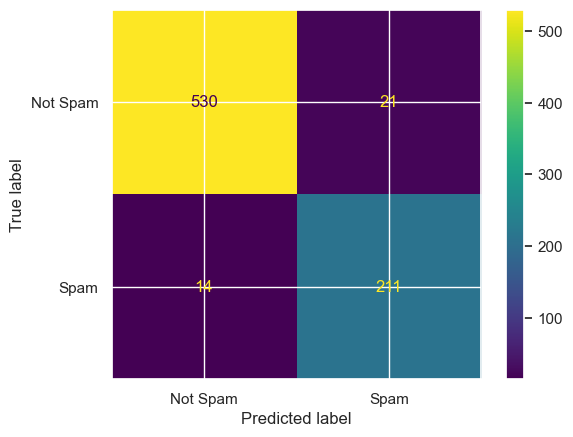

In [76]:
cm = my_confusion_matrix(list(y_test), y_pred_AdaBoost)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
disp.plot()
plt.show()

In [77]:
y_prob_AdaBoost = AdaBoostModel.predict_proba(X_test)
y_prob_AdaBoost[:10]

array([[0.53688544, 0.46311456],
       [0.47533434, 0.52466566],
       [0.74351241, 0.25648759],
       [0.63267303, 0.36732697],
       [0.50649253, 0.49350747],
       [0.51570525, 0.48429475],
       [0.65884219, 0.34115781],
       [0.4786738 , 0.5213262 ],
       [0.49870419, 0.50129581],
       [0.47030227, 0.52969773]])

### ExtraTreesClassifier 

In [78]:
y_pred_ExtraTrees = ExtraTreesModel.predict(X_test) 

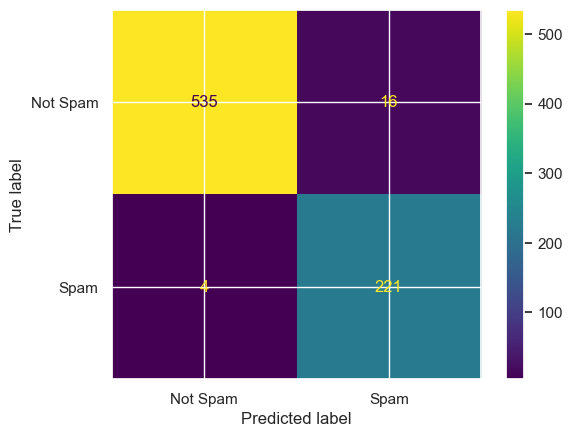

In [79]:
cm = my_confusion_matrix(list(y_test), y_pred_ExtraTrees)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
disp.plot()
plt.show()

In [80]:
y_pred_ExtraTrees[:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [81]:
y_prob_ExtraTrees = ExtraTreesModel.predict_proba(X_test)
y_prob_ExtraTrees[:10]

array([[0.90666667, 0.09333333],
       [0.12666667, 0.87333333],
       [0.94666667, 0.05333333],
       [0.79333333, 0.20666667],
       [0.52      , 0.48      ],
       [0.54666667, 0.45333333],
       [1.        , 0.        ],
       [0.08666667, 0.91333333],
       [0.52705882, 0.47294118],
       [0.29333333, 0.70666667]])

### KNeighborsClassifier

In [82]:
y_pred_KN = KNmodel.predict(X_test)

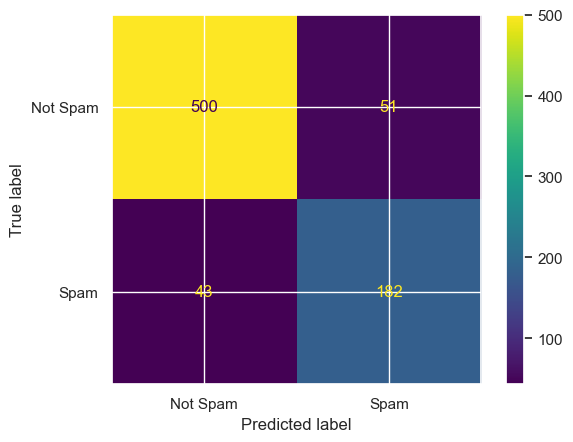

In [83]:
cm = my_confusion_matrix(list(y_test), y_pred_KN)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Spam', 'Spam'])
disp.plot()
plt.show()

In [84]:
y_prob_KN = KNmodel.predict_proba(X_test)
y_prob_KN

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

# 7. Performance evaluation

Once we get the predictions and the probabilities of belonging to a class, we can evaluate the performance of each model using previously implemented metrics.

In [85]:
models = {"Logistic Regression": None, 
            "Naive Bayes": None,
            "Ada Boost Classifier": AdaBoostModel, 
            "Extra Trees Classifier": ExtraTreesModel, 
            "K Nearest Neighbors Classifier": KNmodel}

In [86]:
accuracy, precision, recall, computation, eers = {}, {}, {}, {}, {}
for key in models.keys():
    if key != "Logistic Regression" and key != "Naive Bayes":
        preds = models[key].predict(X_test)
        probs = models[key].predict_proba(X_test)
        accuracy[key] = my_accuracy_score(list(y_test), preds)
        precision[key] = my_precision_score(list(y_test), preds)
        recall[key] = my_recall_score(list(y_test), preds)
        eer, far, frr = compute_EER(probs)
        eers[key] = round(eer*100,2)
    elif key == "Naive Bayes":
        accuracy[key] = my_accuracy_score(list(y_test_NB), y_pred_NB)
        precision[key] = my_precision_score(list(y_test_NB), y_pred_NB)
        recall[key] = my_recall_score(list(y_test_NB), y_pred_NB)
        eer, far, frr = compute_EER_NB(y_proba_NB)
        eers[key] = round(eer*100,2)
    else:
        accuracy[key] =  my_accuracy_score(list(y_test), y_pred_LG)
        precision[key] = my_precision_score(list(y_test), y_pred_LG)
        recall[key] = my_recall_score(list(y_test), y_pred_LG)
        eer, far, frr = compute_EER(y_proba_LG)
        eers[key] = round(eer*100,2)


In [87]:
models_metrics = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
models_metrics['Accuracy'] = accuracy.values()
models_metrics['Precision'] = precision.values()
models_metrics['Recall'] = recall.values()
models_metrics

,Accuracy,Precision,Recall
Logistic Regression,0.963918,0.895582,0.991111
Naive Bayes,0.932990,0.858921,0.920000
Ada Boost Classifier,0.954897,0.909483,0.937778
Extra Trees Classifier,0.974227,0.932489,0.982222
K Nearest Neighbors Classifier,0.878866,0.781116,0.808889


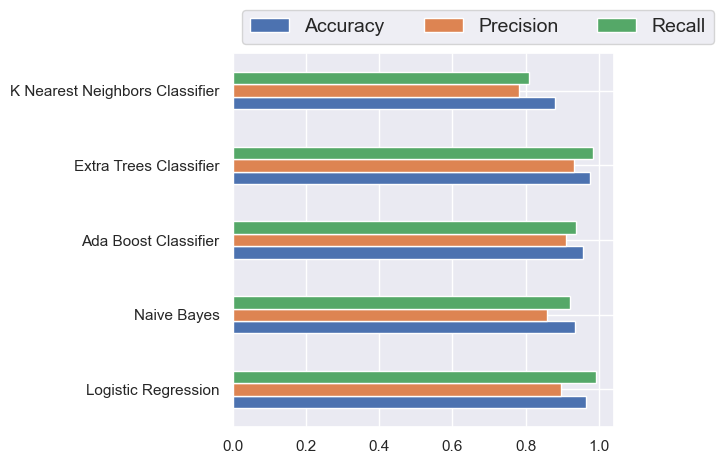

In [88]:
ax = models_metrics.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

In [89]:
computation_time_models = pd.DataFrame(index=models.keys(), columns=['time (seconds)'])
computation_time_models['time (seconds)'] = times.values()
computation_time_models

,time (seconds)
Logistic Regression,52.464631
Naive Bayes,105.095495
Ada Boost Classifier,8.968605
Extra Trees Classifier,5.827159
K Nearest Neighbors Classifier,0.015461


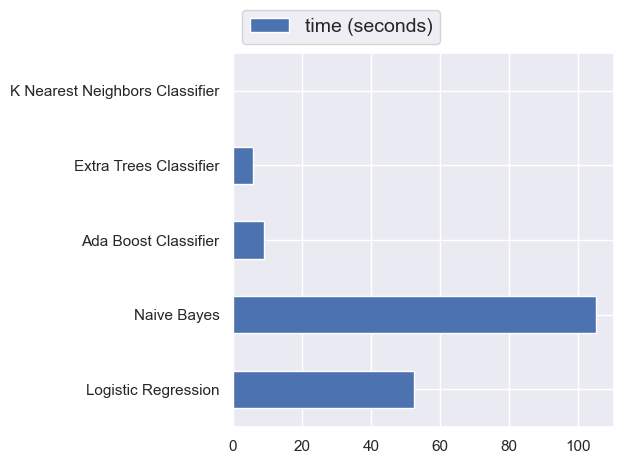

In [90]:
ax = computation_time_models.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

In [91]:
# we should correct the calculation of EER for NB model
eer_models = pd.DataFrame(index=models.keys(), columns=['EER%'])
eer_models['EER%'] = eers.values()
eer_models

,EER%
Logistic Regression,4.09
Naive Bayes,6.60
Ada Boost Classifier,5.02
Extra Trees Classifier,2.25
K Nearest Neighbors Classifier,14.18


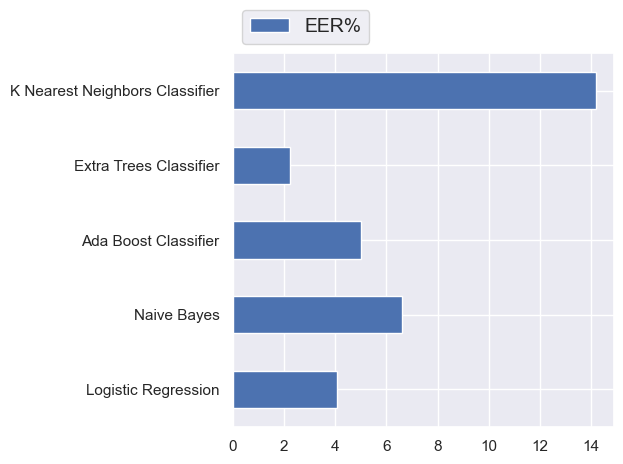

In [92]:
ax = eer_models.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()

We decide to graphically display the EER of the model created by ExtraTreesClassifier in order to show how the EER is the point where the FAR curve and the FRR curve intersect.

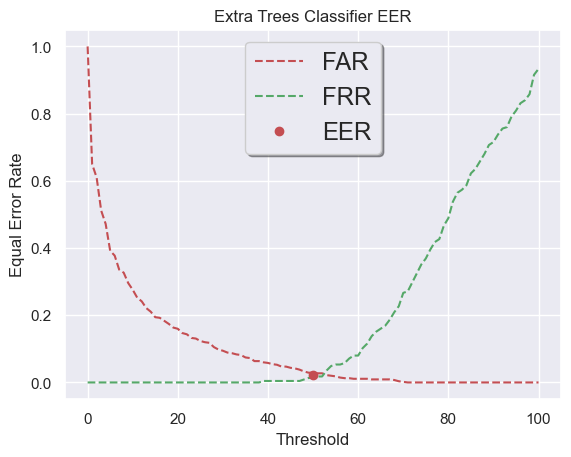

In [93]:
eer_ExtraTrees, far_ExtraTrees, frr_ExtraTrees = compute_EER(y_prob_ExtraTrees)

x = np.linspace(0,1,101) 
fig, ax = plt.subplots()

ax.plot(far_ExtraTrees, 'r--', label='FAR')
ax.plot(frr_ExtraTrees, 'g--', label='FRR')
plt.xlabel('Threshold')
plt.ylabel('Equal Error Rate')
plt.plot(50, eer_ExtraTrees,'ro', label='EER') 
plt.title('Extra Trees Classifier EER')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

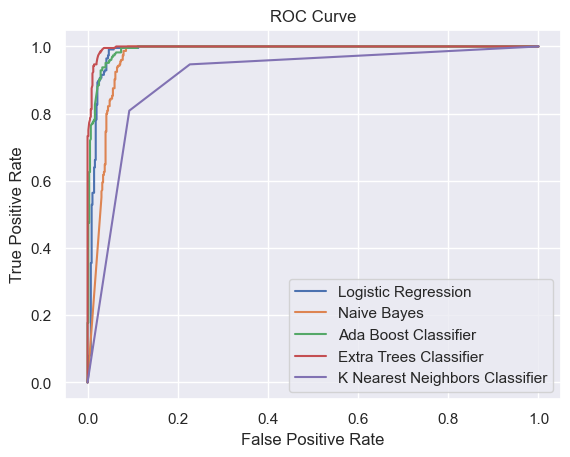

In [94]:
from sklearn.metrics import roc_curve

for key in models.keys():
    if key != "Logistic Regression" and key != "Naive Bayes":
        preds = models[key].predict(X_test)
        probs = models[key].predict_proba(X_test)
        y_prob = [x[1] for x in probs]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label = key)
    elif key == "Naive Bayes":
        fpr, tpr, thresholds = roc_curve(y_test_NB, y_proba_NB[:,1])
        plt.plot(fpr, tpr, label = key)
    else:
        y_prob = [x[1] for x in y_proba_LG]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label = key)
       
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

## 6.3 Cross Validation

In [95]:
scores = {}

for key, model in models.items():
    if key != 'Logistic Regression' and key != "Naive Bayes":
        preds = model.predict(X_val)
        score = my_accuracy_score(list(y_val), preds)
        scores[key] = score
    elif key == "Naive Bayes":
        score = my_accuracy_score(list(y_val_NB), y_pred_NB)
        scores[key] = score
    else:
        y_pred = my_predict(theta_final, x_test, 0.4)
        score = my_accuracy_score(list(y_val), preds)
        scores[key] = score

df_scores = pd.DataFrame(index=scores.keys(), columns=[ 'accuracy'])
df_scores['accuracy'] = scores.values()
df_scores

,accuracy
Logistic Regression,0.568182
Naive Bayes,0.581818
Ada Boost Classifier,0.959091
Extra Trees Classifier,0.986364
K Nearest Neighbors Classifier,0.915152


In [96]:
print('Best classifier: ', sorted(scores.items(), key = lambda item: item[1], reverse = True)[0]) 

Best classifier:  ('Extra Trees Classifier', 0.9863636363636363)


# 7. Conclusions
Extra Trees Classifier results to be the best classifier for this dataset, obtaining the best results in nearly every metrics used to evaluate all the models.
The main advantage of Extra Trees is the reduction in bias. This is in terms of sampling from the entire dataset during the construction of the trees. Different subsets of the data may introduce different biases in the results obtained, hence Extra Trees prevents this by sampling the entire dataset.